# Learnings
Reading this chapter provide the knowledge regarding these topics:

- What is feature scaling and why is it important?
- Theory on various feature scaling techniques and changes they bring to the variables.
- Implementation of each feature scaling technique.

# Prerequisites
Having basic experience or reading on the following topics are plus points:

- Feature, types and characteristics.
- Problem caused by different magnitude of independent variables.
- Norms.
- Basic experience of Pandas, Scikit-learn and NumPy.

# Feature Scaling

__Feature scaling__ is the assortment of techniques that converts the magnitude scales of different variables into a similar range or normalizes the scale through some centering(subtraction) and scaling(division). Only numerical variables are the input to feature scaling techniques. Feature scaling is the _last step of the most ML data preprocessing pipelines_, which is performed before training the ML models.

In the chapter "Introduction to feature engineering," you have already learned the effects of varying feature magnitude and importance of feature scaling. Let's recall the points on the effects of feature magnitude for the sake of revision:

## Effects of variation of feature magnitude

Feature magnitude is the numerical value of the variable. Different ranges or magnitude of the independent variable results to serious obstructions in ML model training such as:

- The scale of the variable's magnitude influences the regression coefficient's value.
- Variables with larger magnitude(bigger range) dominate over ones with smaller magnitude(lower range), nullifying the effect of smaller magnitude variables.
- Algorithms dependent on distance metric, for example, K-means clustering, fabricates different results depending on the scale of variables.
- Gradient Descent converges slower, and finding the support vectors in SVM takes longer.

Applying __feature scaling__ on the dataset removes all the above-mentioned effects of variation in feature magnitude.

## Techniques of feature scaling

You are learning altogether 6 techniques of feature scaling in this notebook. They are as follows:

<center>
<figure>
<!-- <img src="https://docs.google.com/uc?export=download&id=1vzLZw4vYgCSx7_QWIb5ZacwCsPCvgzuM" alt="Types of feature scaling method"> -->
<img src="https://i.postimg.cc/65QQp8bm/image.png">
<br>
<figcaption align="center">Figure 1: Techniques of feature scaling
</figcaption>
</figure>
</center>

The above figure displays the type of feature scaling methods with their respective formulas. Most used feature scaling are Standardization and Minmax scaling.

Applying feature scaling can modify the properties of independent variables or their distribution. These modifications/non-modification are present under the __properties__ sub-section within the description of each feature scaling technique. You are going to learn about these properties along with the working and implementation of each method. The code snippets use both NumPy and Scikit-learn packages for implementing the techniques with the _California_housing_dataset_ from Scikit-learn. Let's dive into these techniques.

#### Notations

$\mathbf{x}$ = Independent variable, can be a single value or the entire column
vector.

$\mathbf{x^T}$ = Feature vector(row vector) that contains the value of variables for single observation in the dataset.

$\mu_{\mathbf{x}}$ =  Mean of the independent variable.

$\sigma_{\mathbf{x}}$ = Standard deviation of the independent variable.

$\min{(\mathbf{x})}$ = Minimum value of the independent variable.

$\max{(\mathbf{x})}$ = Maximum value of the independent variable.

$\text{Median}(\mathbf{x})$ = Median of the independent variable.

$75^{th} \text{Percentile}(\mathbf{x})$ = 75th percentile or 3rd quartile of the independent variable.

$25^{th} \text{Percentile}(\mathbf{x})$ = 25th percentile or 1st quartile of the independent variable.


## Standardization

Standardization applied to the independent variable indicates that the variable's magnitude is subtracted by the mean ($\mu$) and then divided by the standard deviation ($\sigma$). The output after the subtraction and division is known as the __Z-score__, which is the output of the standardization procedure. The Z-score is a useful tool in statistics that represents position of particular observed value of variables with respect to the mean of that variable. Sign of Z-score indicates whether the observation is above(+) or below(-) the mean. Z-score is computed as follows:

$$
\large{\text{Z-score} = \frac{\mathbf{x}-\mu_\mathbf{x}}{\sigma_\mathbf{x}}}
$$

### Properties
Standardization modifies the independent variable in the following way:

- Centers the mean of the variable distribution at 0.
- Scales the variance of the variable distribution at 1.(i.e. standard deviation = 1)
- Variation in the minimum and maximum value of the scaled variable.
- Preserves the outliers of the dataset.
- No change to shape of the variable distribution.

Standardization scaling doesn't constrain the minimum and maximum value to a certain range, which results in the variation of minimum and maximum value per independent variable. Standardization is also affected by the presence of an outlier. Outlier causes slight changes in the mean and standard deviation resulting in lower performance of standardization.

### Demo
At first, Numpy implemented is present in every demo of this chapter. Then comes the Scikit-learn's implementation. The visualization of probability density of variables are done using ```sns.kdeplot()```, which is seaborn's kernel density plot. The y-axis in the plot is the probabiltiy of occurance. The methodologies of the demo is same for every scaling technique. Any deviation are pointed out then and there.

Let's import all the required libraries and dataset required for the demos.

In [ ]:
# Importing libraries and dataset
import numpy as np  # for simple vector manipulation and operatoions
import pandas as pd # for dataframe manipulation and describing the data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Probability density function plots
from sklearn.datasets import fetch_california_housing #california_housing_dataset
from sklearn.model_selection import train_test_split # train_test_split the dataset

Now the below code is for creating the dataframe of the california_housing_dataset for easier description and operations.

In [ ]:
#Lets load the dataset into a dataframe
house = fetch_california_housing()
house_data = pd.DataFrame(data=house.data,
                          columns= house.feature_names)
house_data['MedValue'] = house.target
house_data.head() # display the top 5 values of the Dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


NumPy has 2 essential methods ```np.mean()``` and ```np.std()``` which computes the mean and standard deviation of the given input array or dataframe. ```axis=0``` refers to taking the operation along columns. Now commencing the standardization scaling operation.

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the mean and dividing by standard deviation
mean_df = np.mean(house_data_scaled, axis=0) # Computing the variable wise mean
std_dev_df = np.std(house_data_scaled, axis=0) # Computing the variable wise standard_deviation
house_data_scaled = (house_data_scaled-mean_df)/std_dev_df #Standardization.

Lets describe the dataframe using Pandas ```.describe()``` method which returns mean, std_dev, maximum, minimum and other property per variable.

In [ ]:
# describing the orginal dataframe
np.round(house_data.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,3.9,28.6,5.4,1.1,1425.5,3.1,35.6,-119.6,2.1
std,1.9,12.6,2.5,0.5,1132.5,10.4,2.1,2.0,1.2
min,0.5,1.0,0.8,0.3,3.0,0.7,32.5,-124.4,0.1
25%,2.6,18.0,4.4,1.0,787.0,2.4,33.9,-121.8,1.2
50%,3.5,29.0,5.2,1.0,1166.0,2.8,34.3,-118.5,1.8
75%,4.7,37.0,6.1,1.1,1725.0,3.3,37.7,-118.0,2.6
max,15.0,52.0,141.9,34.1,35682.0,1243.3,42.0,-114.3,5.0


The description of the scaled dataframe shows the mean and standard deviation of the variables change to 0 and 1 respectively. The maximum and minimum values of the variables varies and isn't restricted to a limit.

In [ ]:
# describing the scaled dataframe
np.round(house_data_scaled.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-1.9,-1.6,-1.3,-0.2,-1.4,-2.4,-1.7
25%,-0.7,-0.8,-0.4,-0.2,-0.6,-0.1,-0.8,-1.1,-0.8
50%,-0.2,0.0,-0.1,-0.1,-0.2,-0.0,-0.6,0.5,-0.2
75%,0.5,0.7,0.3,0.0,0.3,0.0,1.0,0.8,0.5
max,5.9,1.9,55.2,69.6,30.3,119.4,3.0,2.6,2.5


Now, Scikit-learns implementation of standardization is conducted using ```StandardScaler``` object. Splitting the dataset is done as in previous chapters using ```train_test_split```.

In [ ]:
# importing the StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Splitting the dataset
X_train, X_test, _, _ = train_test_split(house_data,
                                         house_data['MedValue'],
                                        test_size=0.3,
                                        random_state=42)

```.fit``` and ```.transform``` are the methods to be called like any other Scikit-learn transformer;first fit the data and then use transform dataset to scaled version. Scikit-learn's transformer returns NumPy arrays as output. Dataframe is created from the scaled output array which will be useful for describing and visualization.

In [ ]:
# Fit the dataset
standard_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = standard_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled1 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled1.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-2.2,-1.9,-1.7,-1.2,-0.2,-1.5,-2.4,-1.7
25%,-0.7,-0.8,-0.4,-0.2,-0.6,-0.1,-0.8,-1.1,-0.8
50%,-0.2,0.0,-0.1,-0.1,-0.2,-0.0,-0.6,0.5,-0.2
75%,0.5,0.7,0.3,0.0,0.3,0.0,1.0,0.8,0.5
max,5.8,1.9,55.6,54.8,30.0,100.2,2.9,2.6,2.5


Now, Lets plot the probability distribution of few selected variables from the dataframe. This helps the visualization of the effects of standardization.

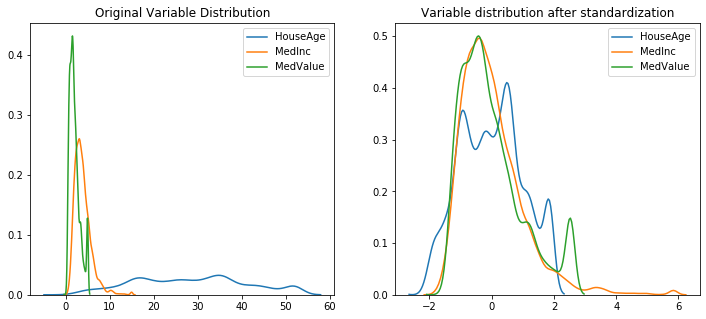

In [ ]:
## Plotting the probability distribution of the variables
def show_plots(X_scaled, title):
    plt.figure(figsize=(12,5))

    plt.subplot(121)
    plt.title('Original Variable Distribution')
    sns.kdeplot(X_train['HouseAge'])
    sns.kdeplot(X_train['MedInc'])
    sns.kdeplot(X_train['MedValue'])

    plt.subplot(122)
    plt.title(title)
    sns.kdeplot(X_scaled['HouseAge'])
    sns.kdeplot(X_scaled['MedInc'])
    sns.kdeplot(X_scaled['MedValue'])

show_plots(X_train_scaled1, 'Variable distribution after standardization')

The graph clearly shows the mean of the variables centered at 0. However the distribution of the variables isn't changed. The variable distribution after standardization might look different, but its only because the scale has been changed. If interested check the distribution of the variables using ```sns.displot()``` method.

## Min-Max Scaling
$$
X_\text{minmax} = \frac{\mathbf{x} - \min{(\mathbf{x})}}{\max{(\mathbf{x})} - \min{(\mathbf{x})}}
$$

The term normalization creates ambiguity in the data science field. It is preferred to this scaling as Min-max scaling.

The value of the variable at first is subtracted by minimum value then divided by the difference between maximum and minimum. Min-Max scaling works well for non-gaussian distribution with a small standard deviation.

### Properties
Min-Max scaling applies following modification on the independent variable:
- Limits the range of scaled variable between 0 and 1.
- Preserves the outlier of the dataset.
- May transform the shape of the variable distribution.
- Mean and variance varies per variable. (No constraint)

Min-Max scaling is profoundly affected by outliers. Outlier's presence results in the minimum or maximum value being those outliers. As a result, most of the non-outliers of the variable gets squeezed into a small range of values after min-max scaling. This is why outlier detection and removal is a must in min-max scaling.

### Demo
Conducting min-max scaling using NumPy package. Calculation of minimum and maximum value is done using ```np.min()``` and ```np.max()``` methods. The minmax scaling is conducted as per the formula.

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the min and dividing by difference of max and min
max_df = np.max(house_data_scaled, axis=0) # Computing the variable wise maximum value
min_df = np.min(house_data_scaled, axis=0) # Computing the variable wise minimum value
house_data_scaled = (house_data_scaled-min_df)/(max_df-min_df) #MinMax scaling

The description of the scaled dataframe displays the minimum and maximum value restricted between range 0 and 1. However, mean and standard deviation of the variables vary.

In [ ]:
np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.2,0.5,0.0,0.0,0.0,0.0,0.3,0.5,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.3,0.2
50%,0.2,0.5,0.0,0.0,0.0,0.0,0.2,0.6,0.3
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.5,0.6,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In Scikit-learn, ```MinMaxScaler``` object performs the minmax scaling. The methodology is same as ```StandardScaler``` and output is numpy array which is converted to Pandas Dataframe. Scikit provides attribute ```feature_range``` that takes tuple as input which defines the minimum and maximum limit of values of the variables.

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
# Fit the dataset
minmax_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = minmax_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled2 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled2.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.2,0.5,0.0,0.0,0.0,0.0,0.3,0.5,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.1,0.3,0.0,0.0,0.0,0.0,0.1,0.3,0.2
50%,0.2,0.5,0.0,0.0,0.0,0.0,0.2,0.6,0.3
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.6,0.6,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Looking at the plot, you can clearly see the the values of the variable limited between range [0,1]. The mean of the variable is not centered at zero, and the variance changes for individual variables.

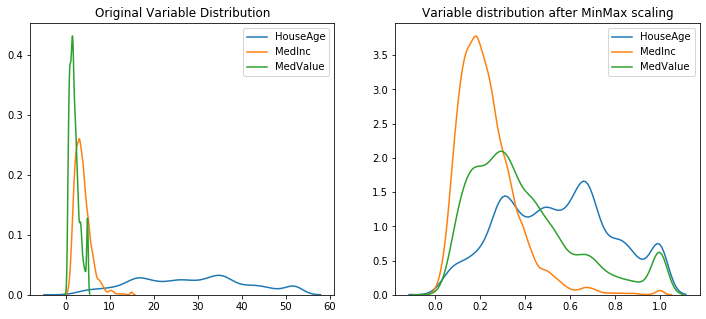

In [ ]:
show_plots(X_train_scaled2,'Variable distribution after MinMax scaling')

## Robust scaling
Robust scaling centers the variable at the median and scales the value according to the inter quartiles.Robust scaling transforms the independent variable as follows:

$$
X_\text{robust} = \frac{\mathbf{x} - \text{Median}(\mathbf{x})}{75^{\text{th}} \text{ Percentile}(\mathbf{x}) - 25^{\text{th}} \text{ Percentile}(\mathbf{x})}
$$

The denominator in the formula is known as Inter-Quartile Range(IQR).

The name "Robust" refers that this scaling technique is robust to the outliers. Don't get confused; the term robust doesn't mean "immune". The outliers are still present in the scaled variable, but values other than the outliers are less affected by the outlier. Outliers removal are a completely different topic that you are learning in later units.

### Properties
Changes are as following after application of robust scaling:
- The variable distribution is centered at 0 with respect to the median.
- Outliers are handled more effectively, although they are preserved.

###  Demo
For the NumPy implementation of robust scaling, ```np.median()``` and ```np.quantile()``` methods outputs the median and quantiles(By default, calculates the percentile) of the variable. . The "q" parameter in ```np.quantile()``` denotes the $i^{th}$ percentile, which should be between 0 and 1. For example, 0.2 represents 20th percentile.

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the median and dividing by IQR
median_df = np.median(house_data_scaled, axis=0) # Computing the variable wise median
first_quartile_df = np.quantile(house_data_scaled, q=0.25, axis=0) # Computing the variable wise 25th percentile
third_quartile_df = np.quantile(house_data_scaled, q=0.75, axis=0) # Computing the variable wise 75th percentile
house_data_scaled = (house_data_scaled-median_df)/(third_quartile_df-first_quartile_df) #Robust scaling.

Describing the dataset reveals that neither mean nor variance is set to 0 and 1. But checking the median value reveals that it has been set to 0.

In [ ]:
print(np.round(house_data_scaled.median(),1))
np.round(house_data_scaled.describe(), 1)


MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
MedValue      0.0
dtype: float64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.2,-0.0,0.1,0.5,0.3,0.3,0.4,-0.3,0.2
std,0.9,0.7,1.5,5.1,1.2,12.2,0.6,0.5,0.8
min,-1.4,-1.5,-2.7,-7.7,-1.2,-2.5,-0.5,-1.5,-1.1
25%,-0.4,-0.6,-0.5,-0.5,-0.4,-0.5,-0.1,-0.9,-0.4
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.6,0.4,0.5,0.5,0.6,0.5,0.9,0.1,0.6
max,5.3,1.2,84.8,353.3,36.8,1455.1,2.0,1.1,2.2


Scikit-learn provides ```RobustScaler``` object for applyinng robust scaling to the variables. The ```quantile-range``` attribute takes tuple as input. The input contains the quartile values along which scaling is conducted.

In [ ]:
# importing the RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [ ]:
# Fit the dataset
robust_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = robust_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled3 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled3.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.2,-0.0,0.1,0.5,0.3,0.4,0.4,-0.3,0.2
std,0.9,0.7,1.5,4.8,1.2,14.6,0.6,0.5,0.8
min,-1.4,-1.5,-2.7,-7.7,-1.2,-2.5,-0.5,-1.5,-1.1
25%,-0.4,-0.6,-0.5,-0.5,-0.4,-0.5,-0.1,-0.9,-0.4
50%,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
75%,0.6,0.4,0.5,0.5,0.6,0.5,0.9,0.1,0.6
max,5.2,1.2,84.8,262.8,36.9,1461.6,2.0,1.1,2.2


The median of the distributions are centered at zero, but other parameters varies with the each variable. However, the values do get squeezed into a smaller range.

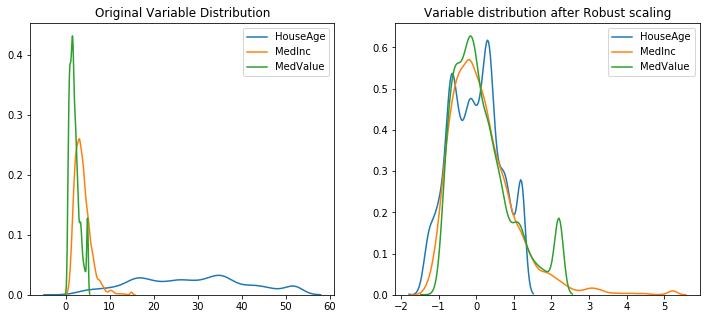

In [ ]:
show_plots(X_train_scaled3, 'Variable distribution after Robust scaling')

## Maximum absolute scaling
As the name suggests maximum absolute scaling, AKA MaxAbs scaling, performs scaling by dividing the value by the maximum value of that variable. The formula of max-absolute scaling is as:

$$
X_\text{MaxAbs} = \frac{\mathbf{x}}{\max{(\mathbf{x})}}
$$

### Properties
Maximum absolute scaling produces the following outcome for the variable:

- The value of the transformed variable is limited to 1.
- Variable values don't get centered at the mean or scaled using standard deviation.
- Transformed variables vary less than min-max scaling's transformed variable(if centerned along mean).

Scikit-learn package suggests taking sparse matrices as input tomaximum absolute scaling. Sparse matrices are matrices where most of the elements are zero. Before feeding the variable into maximum absolute scaling it is useful to center the data at 0 by subtracting the mean of that variable.

### Demo
The max dataframe from the MinMax scaling is used to compute the MaxAbs scaling using NumPy.

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#dividing by maximum value
house_data_scaled = house_data_scaled/max_df #MaxAbs scaling.

The maximum values of the variables is limited to 1. The mean and standard deviation varies per variable.

In [ ]:
np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,0.3,0.6,0.0,0.0,0.0,0.0,0.8,1.0,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.8,1.0,0.0
25%,0.2,0.3,0.0,0.0,0.0,0.0,0.8,1.0,0.2
50%,0.2,0.6,0.0,0.0,0.0,0.0,0.8,1.0,0.4
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.9,1.1,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,1.0


The ```MaxAbsScaler``` object is used for maximum absolution scaling of the variable.

In [ ]:
# importing the RobustScaler
from sklearn.preprocessing import MaxAbsScaler
maxabs_scaler = MaxAbsScaler()

In [ ]:
# Fit the dataset
maxabs_scaler.fit(X_train)
# Scale the dataset
X_train_scaled = maxabs_scaler.transform(X_train) # Transform to scaled version.

X_train_scaled4 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled4.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,0.3,0.5,0.0,0.0,0.0,0.0,0.8,-1.0,0.4
std,0.1,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.8,-1.0,0.0
25%,0.2,0.3,0.0,0.0,0.0,0.0,0.8,-1.0,0.2
50%,0.2,0.6,0.0,0.0,0.0,0.0,0.8,-1.0,0.4
75%,0.3,0.7,0.0,0.0,0.0,0.0,0.9,-0.9,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.9,1.0


The seaborn's plot might be deceiving as small values seems be above 1. The description of the scaled dataframe displays the truth in this matter.

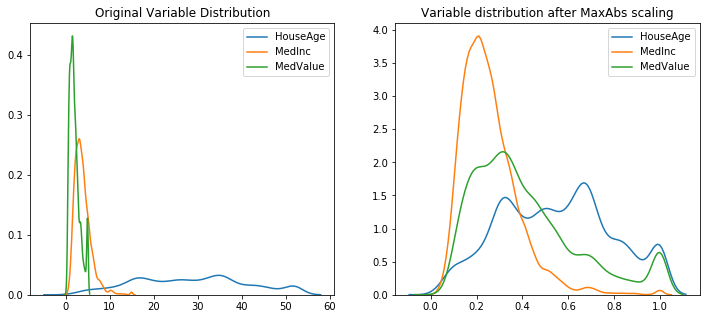

In [ ]:
show_plots(X_train_scaled4, 'Variable distribution after MaxAbs scaling')

As mentioned, it's common for centering to be done before maximum absolute scaling. The ```StandardScaler``` with ```with_std``` attribute as ```False``` conducts the centering of the variables with respect to the mean.

In [ ]:
# Scaler for centering the data.
mean_scaler = StandardScaler(with_std=False)

mean_scaler.fit(X_train)
maxabs_scaler.fit(X_train)

# Scale the dataset
X_train_scaled = maxabs_scaler.transform(mean_scaler.transform(X_train)) # Transform to scaled version.

X_train_scaled_with_center = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

The effect of combining centering with maximum absolute scaling is similar to mean normalization, however the values varies across smaller range. See how the distribution are centered at mean = 0.

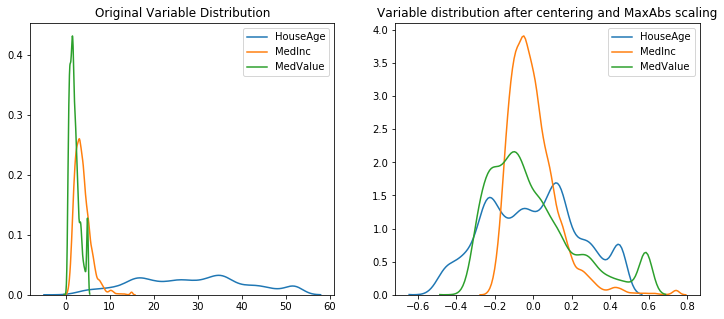

In [ ]:
show_plots(X_train_scaled_with_center, 'Variable distribution after centering and MaxAbs scaling')

## Mean normalization

Mean normalization scales the variables by using the following formula:
$$
X_{\text{MeanNorm}} = \frac{\mathbf{x} - \mu_{\mathbf{x}}}{\max(\mathbf{x}) - \min(\mathbf{x})}
$$

The subtraction with the mean results in centering the variable. Scaling the value is obtained by the division as in minmax scaling.

### Properties
These are the changes after the mean normalization scaling:

- Centers the mean of variable distribution to 0.
- The standard deviation of variable distribution varies with the variable.
- Rescales the variable value to range [-1,1]
- May change the shape of the variable distribution.
- Preserves the outlier in the dataset.

Similar to min-max scaling, mean normalization is highly prone to suffer from outliers at the scaling part. The minimum and maximum values are the outliers resulting in the non-outliers being squeezed into a small range of values.

### Demo
All the required parameters have already been calculated in previous demos. Using mean, max and min dataframes:

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#Subtracting the mean and dividing by difference of max and min
house_data_scaled = (house_data_scaled-mean_df)/(max_df-min_df) #Mean Normalization scaling.

The variables get centered with respect to the mean, while the values gets restricted between range [-1,1]. However, the standard deviation varies with the variable.

In [ ]:
np.round(house_data_scaled.describe(), 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0,20640.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,-0.2,-0.5,-0.0,-0.0,-0.0,-0.0,-0.3,-0.5,-0.4
25%,-0.1,-0.2,-0.0,-0.0,-0.0,-0.0,-0.2,-0.2,-0.2
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,-0.1
75%,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.1
max,0.8,0.5,1.0,1.0,1.0,1.0,0.7,0.5,0.6


Scikit-learn doesn't have a inbuilt work around for mean normalization. There is a workaround, combining two transformers ```StandardScaler(with_std=False)``` and ```RobustScaler(with_centering=False, quantile_range=(0, 100))``` results in mean normalization.

In [ ]:
# Initialize StandardScaler so that it removes the mean only.
scaler_with_mean = StandardScaler(with_mean=True, with_std=False)

# Initialize RobustScaler such that there is only scaling with 0th and 100th quantile
scaler_with_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

scaler_with_mean.fit(X_train)
scaler_with_minmax.fit(X_train)

# Scale the dataset
X_train_scaled = scaler_with_minmax.transform(scaler_with_mean.transform(X_train))
X_train_scaled6 = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

In [ ]:
np.round(X_train_scaled6.describe(),1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedValue
count,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0,14448.0
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.2
min,-0.2,-0.5,-0.0,-0.0,-0.0,-0.0,-0.3,-0.5,-0.4
25%,-0.1,-0.2,-0.0,-0.0,-0.0,-0.0,-0.2,-0.2,-0.2
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,0.1,-0.1
75%,0.1,0.2,0.0,0.0,0.0,0.0,0.2,0.2,0.1
max,0.8,0.5,1.0,1.0,1.0,1.0,0.7,0.5,0.6


The values get squeezed between -1 and 1 with variables centering at mean = 0.

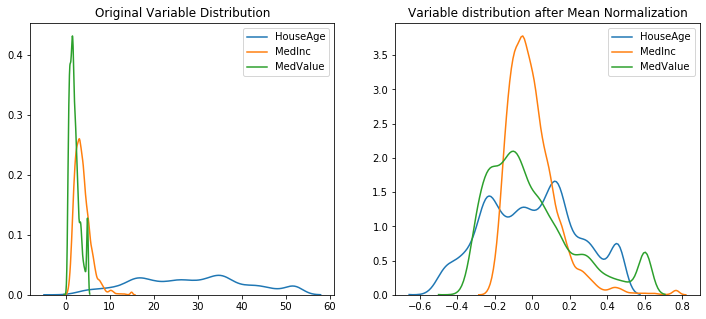

In [ ]:
show_plots(X_train_scaled6, 'Variable distribution after Mean Normalization')

## Scaling to vector unit norm

Scaling to vector unit norm is different from all the previous scaling techniques learned in this chapter. All the other scaling techniques apply scaling over column vector (variable), but scaling to vector unit norm applies scaling over row vectors (feature vector or observations of dataset).

This scaling techniques operates on the feature vector by dividing it with the Manhattan distance(L1 norm) or Euclidean distance(L2 norm) using following formula:

\[
\begin{align*}
\text{X}_{\text{scaled}} &= \frac{\mathbf{x}^T}{\text{L1 or L2 Norm of } \mathbf{x}^T} \\
\text{L1 norm} &= \sum_{i=1}^{n} |x_i| \\
\text{L2 norm} &= \sqrt{\sum_{i=1}^{n} (x_i)^2}
\end{align*}
\]

Where $x_i$ is the $i^{th}$ variable of the feature vector, $n$ is the total number of variables.

The table below will help you understand this scaling technique a bit better:

<center>
<figure>
<!-- <img src="https://docs.google.com/uc?export=download&id=1hYhrAbMjIzuLIHMVI4PaYdgOOghtkJJC" alt="Example of Scaling to vector unit norm"> -->
<img src="https://i.postimg.cc/9MWB4P79/image.png" alt="Example of Scaling to vector unit norm">
<br>
<figcaption align="center">Fig: Procedure of Scaling to vector unit norm. </figcaption>
</figure>
</center>

### Properties
Following are the characteristics of the independent variable after scaling to vector unit norm:
- Norm of the scaled feature vector result to 1.
- The variable with higher value tends to dominate after the scaling. (as seen in the table)
- May distort the variable distribution.

As the name of the scaling suggests, the transformed feature vector is scaled to have unit norm value. This scaling technique isn't used for normal regression or classification tasks. The best application of scaling to vector unit norm is for __clustering and text analysis__ tasks.

###  Demo

NumPy's ```linalg.norm()``` method is used for the computation of norms. The attribute ```ord, axis, keepdims``` denotes the order of the norm, computation of norm along certain axis(1=rows), and keeping the dimension after computation respectively. First, the norm is calculated then divided with the variables.

In [ ]:
# Using numpy and pandas
house_data_scaled = house_data.copy() #copying the dataframe

#computing the norms
l1_norm = np.linalg.norm(house_data_scaled, ord=1, axis=1, keepdims=True) #Manhattan distance
l2_norm = np.linalg.norm(house_data_scaled, ord=2, axis=1, keepdims=True) #Euclidean distance

#Dividing the values with norm
house_data_scaled_l1_norm = house_data_scaled/l1_norm
house_data_scaled_l2_norm = house_data_scaled/l2_norm

Describing the dataframe won't be that helpful for this scaling. Let's see the norm of observations before and after scaling. Notice the norms of each observation has been set to 1 after the scaling.

In [ ]:
# norm before l1 scaling
np.linalg.norm(house_data_scaled, ord=1, axis=1, keepdims=True)

array([[ 546.52469206],
       [2603.2862594 ],
       [ 731.03224181],
       ...,
       [1195.92427021],
       [ 931.08884183],
       [1575.92656226]])

In [ ]:
# norm after l1 scaling
np.linalg.norm(house_data_scaled_l1_norm, ord=1, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
# norm before l2 scaling
np.linalg.norm(house_data_scaled, ord=2, axis=1, keepdims=True)

array([[ 349.12206749],
       [2404.52473138],
       [ 515.01262658],
       ...,
       [1015.19678688],
       [ 752.14144698],
       [1392.95242225]])

In [ ]:
# norm after l2 scaling
np.linalg.norm(house_data_scaled_l2_norm, ord=2, axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Scikit-learn provides ```Normalizer``` transformer for computation of scaling with vector unit norm. The ```norm``` parameters represents norm that is used for scaling.

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Initializing l1 and l2 scalers

l1_scaler = Normalizer(norm='l1')
l2_scaler = Normalizer(norm='l2')

In [ ]:
# Applying scaling with vector unit norm with norm=l1
l1_scaler.fit(X_train)
X_train_scaled = l1_scaler.transform(X_train)
X_train_scaled7 = pd.DataFrame(X_train_scaled, columns=X_train.columns)

Display the probability distribution shows the values of variables being scaled starting from 0.

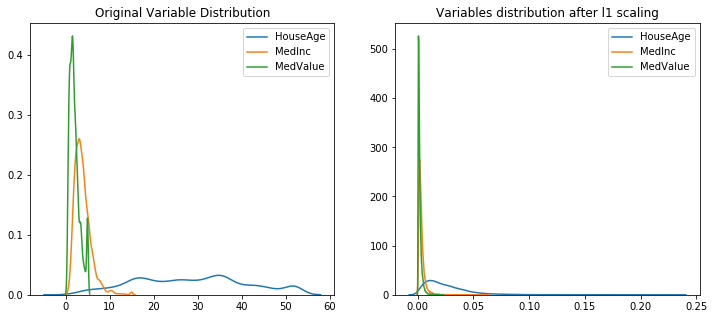

In [ ]:
show_plots(X_train_scaled7, 'Variables distribution after l1 scaling')

This scaling heavily changes the distribution of the variable as seen below. This is why this scaling technique isn't typically used for classification or regression tasks.

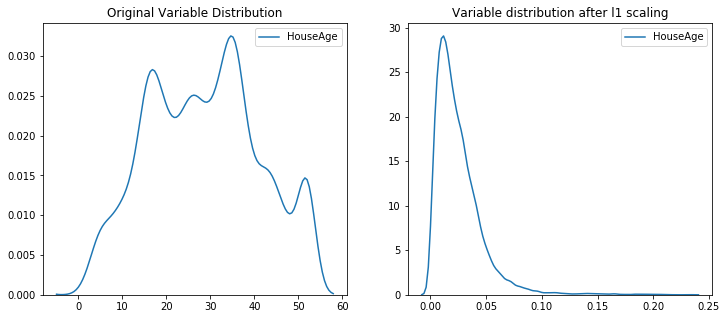

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Original Variable Distribution')
sns.kdeplot(X_train['HouseAge'])

plt.subplot(122)
plt.title('Variable distribution after l1 scaling')
sns.kdeplot(X_train_scaled7['HouseAge'])

Similarly applying scaling with vector unit norm using l2 norm and plotting the distributions.

In [ ]:
l2_scaler.fit(X_train)
X_train_scaled = l2_scaler.transform(X_train)
X_train_scaled8 = pd.DataFrame(X_train_scaled, columns=X_train.columns)

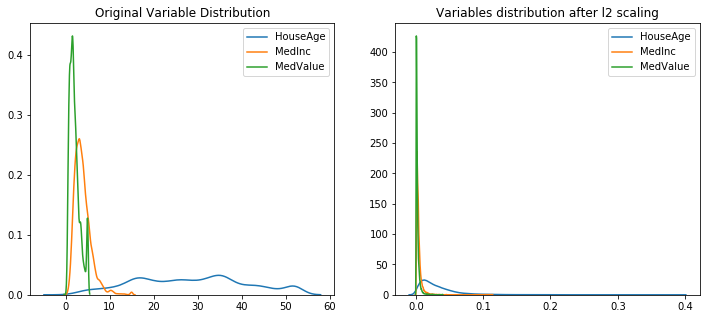

In [ ]:
show_plots(X_train_scaled8, 'Variables distribution after l2 scaling')

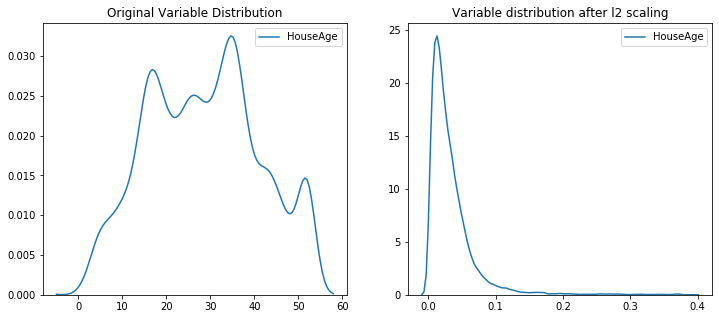

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.title('Original Variable Distribution')
sns.kdeplot(X_train['HouseAge'])

plt.subplot(122)
plt.title('Variable distribution after l2 scaling')
sns.kdeplot(X_train_scaled8['HouseAge'])

## Key-Take Aways

Concluding this chapter the main points to remember are:

- Feature scaling techniques takes numerical variables as input, which scales the values into similar range.
- Feature scaling is generally last step of preprocessing before feeding the data into ML algorithms for training.


| Feature Scaling Technique     | Value range after scaling | Distorts original distribution | Centered at | Scaled by          |
|-------------------------------|---------------------------|--------------------------------|-------------|--------------------|
| Standardization               | No restriction            | No                             | Mean        | Standard deviation |
| Min-Max Scaling               | [0,1]                     | Maybe                          | Varies(Min) | Varies (Min-Max)   |
| Robust Scaling                | No restriction            | Maybe                          | Median      | IQR                |
| Maximum Absolute Scaling      | Up to 1                   | Maybe                          | None        | Varies (Max)       |
| Mean Normalization            | [-1,1]                    | Maybe                          | Mean        | Varies (Min-Max)   |
| Scaling with Vector Unit Norm | No restriction            | Yes                            | None        | Norm (L1 or L2)    |

<center>Table 1: Properties of each scaling technique</center>

Scan through the table for getting the grasp of the properties of the scaling techniques learned in this chapter.

- Standardization, minmax, maxabs, and mean normalization get affected by the presence of outliers. It's suggested to use outlier removal before using techniques.
- Scaling with vector unit norm are done for the algorithms such as clustering and text analysis.
